In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Read in the data
oly = pd.read_csv("oly.csv")

In [3]:
#look at the first 5 entries
oly.head()

,Unnamed: 0,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,...,value_type,medal,year,game_end_date,game_start_date,game_location,game_name,game_season,game_year,country
0,0,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Spain
1,1,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,San Marino
2,2,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,United States
3,3,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,...,NaN,False,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Slovakia
4,4,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,...,NaN,False,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Japan


In [9]:
#Goal: get the overall medal count for our countries

#notice the "medal" column is true if a medal was won, false otherwise
#so if we group by country, and some the "medal" column we will sum Trues and Falses, 
#where True is converted to 1 and False is converted to 0
country_medals = oly.groupby("country")[["medal"]].sum()  

#rearrange datatable so first row has lowest medal count, last row has highest
sorted_country_medals = country_medals.sort_values(by = "medal")

#inspect the top 20 medal earners
sorted_country_medals[-20:]   #"negative 20" means the last 20th entry
                              #"negative 20 colon" means the last 20th entry and onward to last entry

,medal
country,
Ukraine,147
Spain,148
Switzerland,150
Sweden,160
Austria,171
Hungary,172
Cuba,183
Norway,268
Netherlands,276


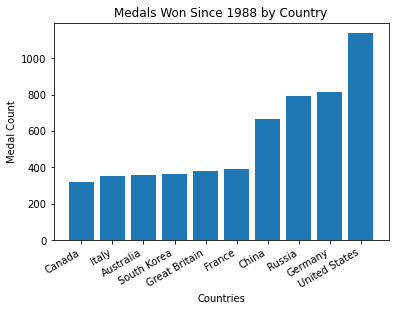

In [36]:
#Goal: Graph the top 10 medal earners

n = 10
top_country_medals = sorted_country_medals[-n:]
top_country_medals.index
top_country_medals["medal"]

#Bar chart
fig, ax = plt.subplots(1)
ax.bar(top_country_medals.index, top_country_medals["medal"])
plt.xticks(rotation=30, ha='right')
plt.title("Medals Won Since 1988 by Country")
plt.xlabel("Countries")
plt.ylabel("Medal Count")
plt.show()

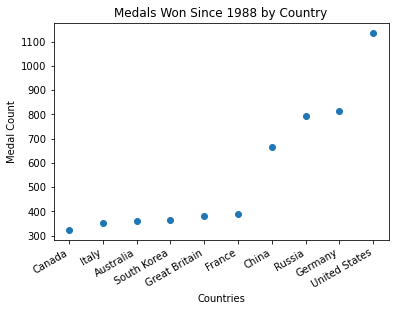

In [37]:
#Dot Plot
fig, ax = plt.subplots(1)
ax.plot(top_country_medals.index, top_country_medals["medal"],
       marker = "o",
       linestyle = "")
plt.xticks(rotation=30, ha='right')
plt.title("Medals Won Since 1988 by Country")
plt.xlabel("Countries")
plt.ylabel("Medal Count")
plt.show()

In [38]:
#seeing highest medal counts by country per individual games
country_medals = oly.groupby(["slug_game", "country"])[["medal"]].sum()
sorted_country_medals = country_medals.sort_values(by = "medal")
sorted_country_medals[-20:]

,,medal
slug_game,country,
london-2012,Russia,67
tokyo-2020,Russia,70
rio-2016,China,70
barcelona-1992,Germany,82
tokyo-2020,China,88
sydney-2000,Russia,89
athens-2004,Russia,90
london-2012,China,91
sydney-2000,United States,93
